In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_pickle('pv_apps.pkl')

In [3]:
df.head(5)

,application id,preceding id,superceding id,matched csi application number,application status,utility,service city,service zip,service county,technology type,...,inverter model 7,inverter manufacturer 7,inverter quantity 7,inverter model 8,inverter manufacturer 8,inverter quantity 8,inverter model 9,inverter manufacturer 9,inverter quantity 9,time_to_approval
0,PGE-INT-106960608,NaN,NaN,NaN,Interconnected,PGE,NaN,nan,BUTTE,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307 days
1,PGE-INT-106960610,NaN,PGE-INT-114660819,NaN,Interconnected,PGE,NaN,nan,SAN MATEO,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37 days
3,PGE-INT-106960621,NaN,NaN,NaN,Interconnected,PGE,NaN,nan,SAN FRANCISCO,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046 days
4,PGE-INT-106960670,PGE-INT-113318949,PGE-INT-114200704,NaN,Interconnected,PGE,NaN,nan,MONTEREY,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301 days
5,PGE-INT-106960671,NaN,NaN,NaN,Interconnected,PGE,NaN,nan,ALAMEDA,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158 days


In [40]:
df.columns.values

array(['application id', 'preceding id', 'superceding id',
       'matched csi application number', 'application status', 'utility',
       'service city', 'service zip', 'service county', 'technology type',
       'system size dc', 'system size ac', 'storage capacity (kwh)',
       'storage size (kw ac)', 'inverter size (kw ac)', 'tilt', 'azimuth',
       'mounting method', 'tracking', 'customer sector',
       'app received date', 'app complete date', 'app approved date',
       'decommissioned date', 'self installer', 'installer name',
       'installer phone', 'installer city', 'installer state',
       'installer zip', 'cslb number', 'third party owned',
       'third party owned type', 'third party name', 'pace financed',
       'pace financier', 'electric vehicle', 'electric vehicle count',
       'system output monitoring', 'system output reports to vendor?',
       'system output monitoring provider', 'total system cost',
       'itc cost basis', 'cost/watt', 'nem tariff',
   

In [34]:
df = df[df['time_to_approval'] > 0]
df = df[df['time_to_approval'] < 1000]

In [35]:
df['time_to_approval'] = df['time_to_approval'].astype(str).str.replace('days','')
df['time_to_approval'] = df['time_to_approval'].str.replace('NaT','0')
df['time_to_approval'] = pd.to_numeric(df['time_to_approval'])

<AxesSubplot:xlabel='time_to_approval', ylabel='Density'>

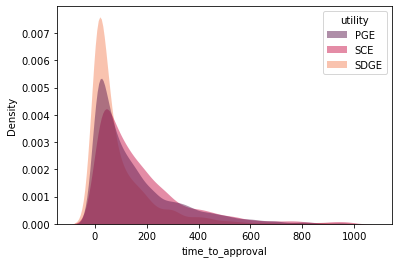

In [37]:
sns.kdeplot(
   data=df, x="time_to_approval", hue="utility",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

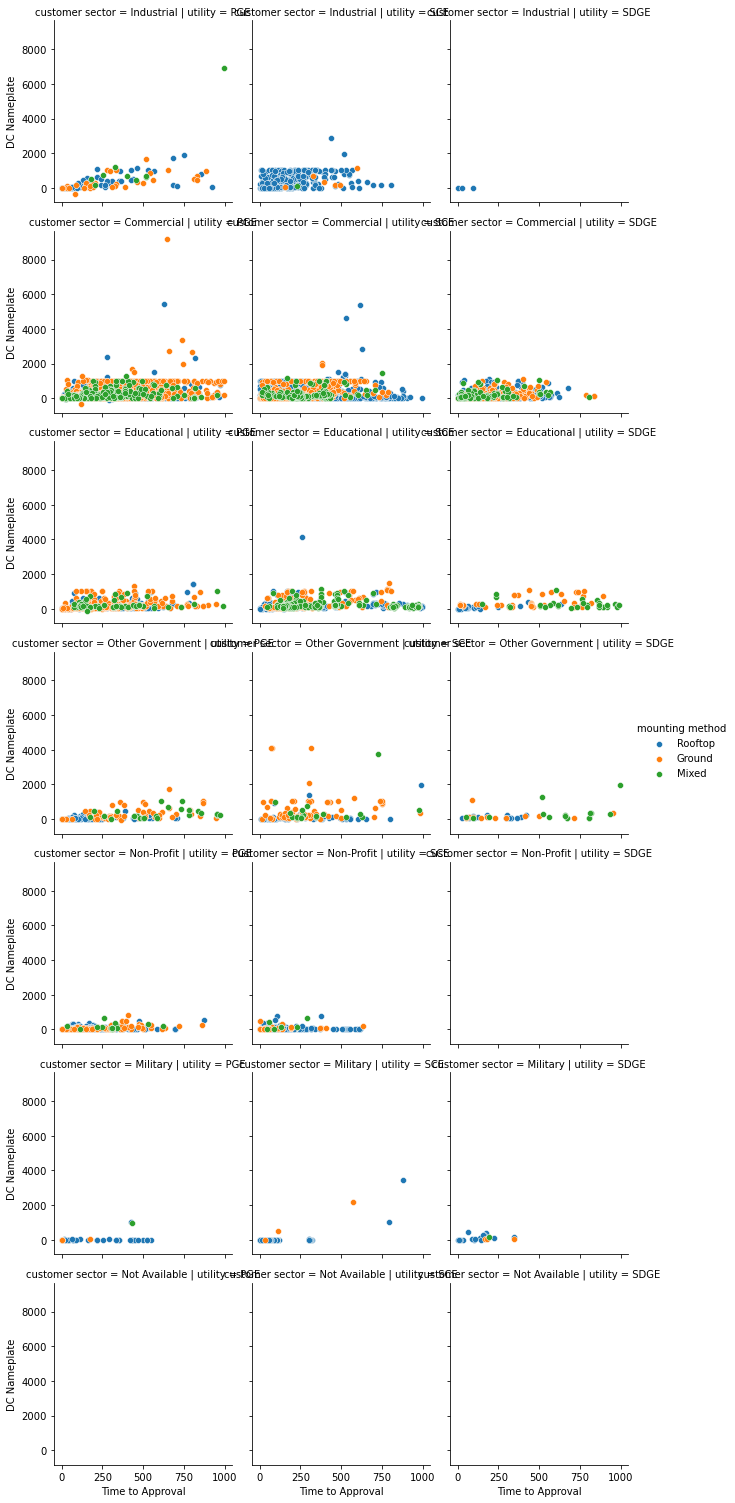

In [42]:
g = sns.FacetGrid(data=df, col='utility', row='customer sector', hue='mounting method')
g.map(sns.scatterplot, "time_to_approval", "system size dc")
g.set_axis_labels("Time to Approval", "DC Nameplate")
g.add_legend()